# Speech Recognition (audio classification)

### input audio data to the neural network, and  output the label name.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import random as rn
import librosa.display

In [2]:
from keras.layers import Dense
from keras import Input
from keras.engine import Model
from keras.utils import to_categorical
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, \
    LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D

/home/yanhua/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
DATA_DIR = '/home/yanhua/Documents/jupyter/yan/demo/free-spoken-digit-dataset-master/recordings/'

In [4]:
random_file = rn.choice(os.listdir(DATA_DIR))

In [5]:
random_file

'7_theo_49.wav'

In [6]:
wav, sr = librosa.load(DATA_DIR + random_file)
print ('sr:', sr)
print ('wav shape:', wav.shape)
print ('length:', wav.shape[0]/float(sr), 'secs')

sr: 22050
wav shape: (7853,)
length: 0.3561451247165533 secs


Import the audio playback widget

In [7]:
from IPython.display import Audio


In [ ]:
import mir_eval

In [35]:
Audio(data=wav, rate=sr)

In [36]:
wav, sr = librosa.load(DATA_DIR + random_file, sr=None)
print ('sr:', sr)
print ('wav shape:', wav.shape)
print ('length:', wav.shape[0]/float(sr), 'secs')

sr: 8000
wav shape: (2849,)
length: 0.356125 secs


In [37]:
random_file

'7_theo_49.wav'

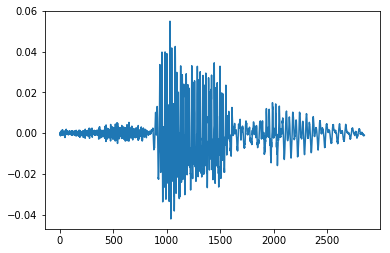

In [38]:
plt.plot(wav)

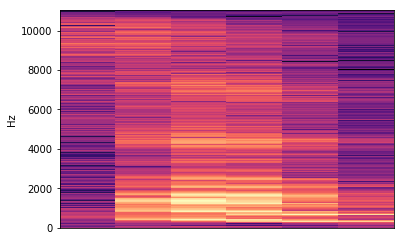

In [13]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(wav)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')

In [14]:
test_speaker = 'theo'
train_X = []
train_spectrograms = []
train_mel_spectrograms = []
train_mfccs = []
train_y = []

test_X = []
test_spectrograms = []
test_mel_spectrograms = []
test_mfccs = []
test_y = []

pad1d = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
pad2d = lambda a, i: a[:, 0: i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0],i - a.shape[1]))))

for fname in os.listdir(DATA_DIR):
    try:
        if '.wav' not in fname or 'dima' in fname:
            continue
        struct = fname.split('_')
        digit = struct[0]
        speaker = struct[1]
        wav, sr = librosa.load(DATA_DIR + fname)
        padded_x = pad1d(wav, 30000)
        spectrogram = np.abs(librosa.stft(wav))
        padded_spectogram = pad2d(spectrogram,40)

        mel_spectrogram = librosa.feature.melspectrogram(wav)
        padded_mel_spectrogram = pad2d(mel_spectrogram,40)

        mfcc = librosa.feature.mfcc(wav)
        padded_mfcc = pad2d(mfcc,40)

        if speaker == test_speaker:
            test_X.append(padded_x)
            test_spectrograms.append(padded_spectogram)
            test_mel_spectrograms.append(padded_mel_spectrogram)
            test_mfccs.append(padded_mfcc)
            test_y.append(digit)
        else:
            train_X.append(padded_x)
            train_spectrograms.append(padded_spectogram)
            train_mel_spectrograms.append(padded_mel_spectrogram)
            train_mfccs.append(padded_mfcc)
            train_y.append(digit)
    except Exception as e:
        print (fname, e)
        raise

train_X = np.vstack(train_X)
train_spectrograms = np.array(train_spectrograms)
train_mel_spectrograms = np.array(train_mel_spectrograms)
train_mfccs = np.array(train_mfccs)
train_y = to_categorical(np.array(train_y))

test_X = np.vstack(test_X)
test_spectrograms = np.array(test_spectrograms)
test_mel_spectrograms = np.array(test_mel_spectrograms)
test_mfccs = np.array(test_mfccs)
test_y = to_categorical(np.array(test_y))




In [15]:
print ('train_X:', train_X.shape)
print ('train_spectrograms:', train_spectrograms.shape)
print ('train_mel_spectrograms:', train_mel_spectrograms.shape)
print ('train_mfccs:', train_mfccs.shape)
print ('train_y:', train_y.shape)
print
print ('test_X:', test_X.shape)
print ('test_spectrograms:', test_spectrograms.shape)
print ('test_mel_spectrograms:', test_mel_spectrograms.shape)
print ('test_mfccs:', test_mfccs.shape)
print ('test_y:', test_y.shape)

train_X: (1500, 30000)
train_spectrograms: (1500, 1025, 40)
train_mel_spectrograms: (1500, 128, 40)
train_mfccs: (1500, 20, 40)
train_y: (1500, 10)
test_X: (500, 30000)
test_spectrograms: (500, 1025, 40)
test_mel_spectrograms: (500, 128, 40)
test_mfccs: (500, 20, 40)
test_y: (500, 10)


In [16]:
train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [17]:
train_X[1,0],train_X[1,2],train_X[1,29999],train_X[1,]

(0.00947602279484272,
 0.012364860624074936,
 0.0,
 array([0.00947602, 0.01161752, 0.01236486, ..., 0.        , 0.        ,
        0.        ]))

In [18]:
train_X[0].shape

(30000,)

In [19]:
ip = Input(shape=(train_X[0].shape))
hidden = Dense(128, activation='relu')(ip)
op = Dense(10, activation='softmax')(hidden)
model = Model(input=ip, output=op)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3840128   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 3,841,418
Trainable params: 3,841,418
Non-trainable params: 0
_________________________________________________________________


/home/yanhua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_X,
          train_y,
          epochs=10,
          batch_size=32,
          validation_data=(test_X, test_y))

Train on 1500 samples, validate on 500 samples
Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 2.3033 - acc: 0.1573 - val_loss: 2.2966 - val_acc: 0.1600
Epoch 2/10
1500/1500 [==============================] - 0s 261us/step - loss: 1.7357 - acc: 0.5140 - val_loss: 2.3020 - val_acc: 0.1440
Epoch 3/10
1500/1500 [==============================] - 0s 260us/step - loss: 1.4000 - acc: 0.6293 - val_loss: 2.3062 - val_acc: 0.1440
Epoch 4/10
1500/1500 [==============================] - 0s 266us/step - loss: 1.1558 - acc: 0.7153 - val_loss: 2.3199 - val_acc: 0.1340
Epoch 5/10
1500/1500 [==============================] - 0s 271us/step - loss: 0.9828 - acc: 0.7720 - val_loss: 2.3346 - val_acc: 0.1360
Epoch 6/10
1500/1500 [==============================] - 0s 272us/step - loss: 0.8567 - acc: 0.8087 - val_loss: 2.3505 - val_acc: 0.1260
Epoch 7/10
1500/1500 [==============================] - 0s 271us/step - loss: 0.7568 - acc: 0.8440 - val_loss: 2.3692 - val_acc: 0.1220
Epo

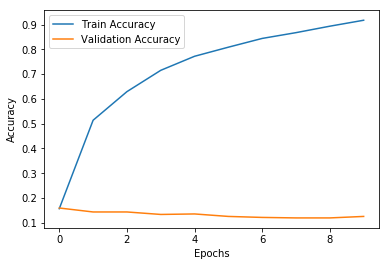

In [21]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# SPECTROGRAMS CNN

In [22]:
train_X_ex = np.expand_dims(train_spectrograms, -1)
test_X_ex = np.expand_dims(test_spectrograms, -1)
print ('train X shape:', train_X_ex.shape)
print ('test X shape:', test_X_ex.shape)

train X shape: (1500, 1025, 40, 1)
test X shape: (500, 1025, 40, 1)


In [23]:
ip = Input(shape=train_X_ex[0].shape)
m = Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Conv2D(64, kernel_size=(4, 4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Flatten()(m)
m = Dense(32, activation='relu')(m)
op = Dense(10, activation='softmax')(m)

model = Model(input=ip, output=op)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1025, 40, 1)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1022, 37, 64)      1088      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 255, 9, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 255, 9, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 146880)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4700192   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total para

/home/yanhua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_X_ex,
          train_y,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_data=(test_X_ex, test_y))

Train on 1500 samples, validate on 500 samples
Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.2961 - acc: 0.6067 - val_loss: 1.6961 - val_acc: 0.4840
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3511 - acc: 0.9073 - val_loss: 1.4303 - val_acc: 0.5180
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2434 - acc: 0.9247 - val_loss: 1.4355 - val_acc: 0.4840
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1570 - acc: 0.9553 - val_loss: 1.5715 - val_acc: 0.4900
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1205 - acc: 0.9720 - val_loss: 1.7203 - val_acc: 0.5040
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1368 - acc: 0.9660 - val_loss: 2.2866 - val_acc: 0.3820
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1331 - acc: 0.9693 - val_loss: 1.6535 - val_acc: 0.4160
Epoch 8/10
1500

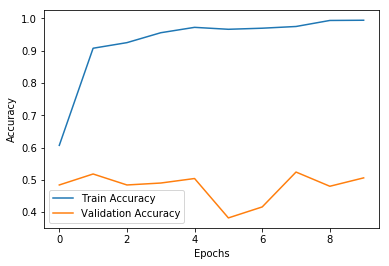

In [25]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# MEL SPECTROGRAM CNN

In [26]:
train_X_ex = np.expand_dims(train_mel_spectrograms, -1)
test_X_ex = np.expand_dims(test_mel_spectrograms, -1)
print ('train X shape:', train_X_ex.shape)
print ('test X shape:', test_X_ex.shape)

train X shape: (1500, 128, 40, 1)
test X shape: (500, 128, 40, 1)


In [27]:
ip = Input(shape=train_X_ex[0].shape)
m = Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Conv2D(64, kernel_size=(4, 4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Flatten()(m)
m = Dense(32, activation='relu')(m)
op = Dense(10, activation='softmax')(m)

model = Model(input=ip, output=op)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128, 40, 1)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 37, 64)       1088      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 9, 64)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 9, 64)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 17856)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                571424    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total para

/home/yanhua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_X_ex,
          train_y,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_data=(test_X_ex, test_y))

Train on 1500 samples, validate on 500 samples
Epoch 1/10
1500/1500 [==============================] - 1s 521us/step - loss: 2.0076 - acc: 0.4387 - val_loss: 2.2008 - val_acc: 0.2460
Epoch 2/10
1500/1500 [==============================] - 0s 302us/step - loss: 1.3413 - acc: 0.5673 - val_loss: 2.1660 - val_acc: 0.2340
Epoch 3/10
1500/1500 [==============================] - 0s 319us/step - loss: 1.0354 - acc: 0.6713 - val_loss: 2.1884 - val_acc: 0.1820
Epoch 4/10
1500/1500 [==============================] - 1s 372us/step - loss: 0.8489 - acc: 0.7427 - val_loss: 2.1556 - val_acc: 0.2180
Epoch 5/10
1500/1500 [==============================] - 1s 373us/step - loss: 0.7622 - acc: 0.7820 - val_loss: 2.0648 - val_acc: 0.2620
Epoch 6/10
1500/1500 [==============================] - 1s 372us/step - loss: 0.7032 - acc: 0.8173 - val_loss: 2.1132 - val_acc: 0.3120
Epoch 7/10
1500/1500 [==============================] - 1s 372us/step - loss: 0.8869 - acc: 0.7900 - val_loss: 2.1854 - val_acc: 0.2740
E

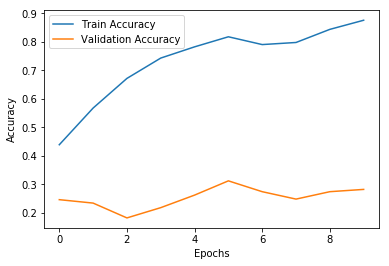

In [29]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# MFCC CNN

In [30]:
train_X_ex = np.expand_dims(train_mfccs, -1)
test_X_ex = np.expand_dims(test_mfccs, -1)
print ('train X shape:', train_X_ex.shape)
print ('test X shape:', test_X_ex.shape)

train X shape: (1500, 20, 40, 1)
test X shape: (500, 20, 40, 1)


In [31]:
ip = Input(shape=train_X_ex[0].shape)
m = Conv2D(64, kernel_size=(4, 4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
# m = Conv2D(128, kernel_size=(2, 2), activation='relu')(ip)
# m = MaxPooling2D(pool_size=(2, 2))(m)
m = Flatten()(m)
m = Dense(32, activation='relu')(m)
op = Dense(10, activation='softmax')(m)

model = Model(input=ip, output=op)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 20, 40, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 17, 37, 64)        1088      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 9, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                73760     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 75,178
Trainable params: 75,178
Non-trainable params: 0
_________________________________________________________________


/home/yanhua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_X_ex,
          train_y,
          epochs=100,
          batch_size=32,
          verbose=0,
          validation_data=(test_X_ex, test_y))

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_X_ex,
          train_y,
          epochs=100,
          batch_size=32,
          verbose=1,
          validation_data=(test_X_ex, test_y))

Train on 1500 samples, validate on 500 samples
Epoch 1/100
1500/1500 [==============================] - 0s 249us/step - loss: 0.3173 - acc: 0.9140 - val_loss: 3.3729 - val_acc: 0.5020
Epoch 2/100
1500/1500 [==============================] - 0s 91us/step - loss: 0.2133 - acc: 0.9680 - val_loss: 3.1066 - val_acc: 0.5020
Epoch 3/100
1500/1500 [==============================] - 0s 87us/step - loss: 0.2334 - acc: 0.9513 - val_loss: 2.6861 - val_acc: 0.5320
Epoch 4/100
1500/1500 [==============================] - 0s 86us/step - loss: 0.2335 - acc: 0.9507 - val_loss: 3.0593 - val_acc: 0.5280
Epoch 5/100
1500/1500 [==============================] - 0s 84us/step - loss: 0.2350 - acc: 0.9427 - val_loss: 2.7844 - val_acc: 0.5260
Epoch 6/100
1500/1500 [==============================] - 0s 84us/step - loss: 0.2053 - acc: 0.9640 - val_loss: 2.7627 - val_acc: 0.5280
Epoch 7/100
1500/1500 [==============================] - 0s 83us/step - loss: 0.1938 - acc: 0.9620 - val_loss: 2.8276 - val_acc: 0.5440


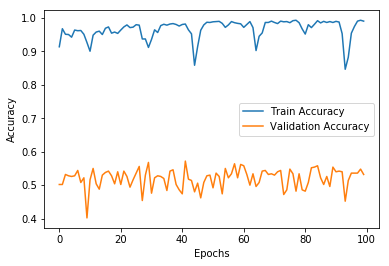

In [34]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()